In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

dados = pd.read_csv('/kaggle/input/rio-de-janeiro-airbnb-listings-2022/AirbnbRJRentals.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28301 entries, 0 to 28300
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              28301 non-null  int64  
 1   name                            28272 non-null  object 
 2   host_id                         28301 non-null  int64  
 3   host_name                       28298 non-null  object 
 4   neighbourhood                   28301 non-null  object 
 5   latitude                        28301 non-null  float64
 6   longitude                       28301 non-null  float64
 7   room_type                       28301 non-null  object 
 8   price                           28301 non-null  int64  
 9   minimum_nights                  28301 non-null  int64  
 10  number_of_reviews               28301 non-null  int64  
 11  last_review                     19783 non-null  object 
 12  reviews_per_month               

Uma vez que os mesmos valores faltantes de host_id e host_name estão inclusos nos faltantes last_review e review_per_month, e que review_per_month pode ser interessante à analise, uma exclusão das linhas foi realizada.

In [2]:
dados_limpos = dados.dropna()
dados_limpos.select_dtypes('int64').describe().drop(columns={'id', 'host_id'})

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,19781.000000,19781.000000,19781.000000,19781.000000,19781.000000,19781.000000
mean,1208.160710,3.959001,25.040898,8.602497,190.993529,8.808453
std,7355.949295,20.428644,43.059332,24.374662,131.770325,11.802266
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,300.000000,2.000000,3.000000,1.000000,65.000000,1.000000
50%,557.000000,2.000000,9.000000,2.000000,176.000000,4.000000
75%,971.000000,3.000000,27.000000,4.000000,329.000000,12.000000
max,500000.000000,999.000000,563.000000,228.000000,365.000000,174.000000


Devido à extrema quantidade de outliers em price, foi realizado um recorte na base de dados com base no desvio padrão de price.

In [3]:
deciles = pd.DataFrame(dados_limpos.select_dtypes('int64').quantile([0.1 * i for i in range(1, 10)]))
deciles.drop(columns={'id', 'host_id'})

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0.1,170.0,1.0,1.0,1.0,11.0,0.0
0.2,254.0,1.0,2.0,1.0,49.0,1.0
0.3,350.0,2.0,3.0,1.0,81.0,2.0
0.4,450.0,2.0,5.0,1.0,130.0,3.0
0.5,557.0,2.0,9.0,2.0,176.0,4.0
0.6,693.0,3.0,13.0,2.0,266.0,6.0
0.7,853.0,3.0,21.0,3.0,313.0,10.0
0.8,1103.0,4.0,36.0,6.0,342.0,15.0
0.9,1671.0,5.0,68.0,17.0,358.0,25.0


(1672.0, 500000.0)

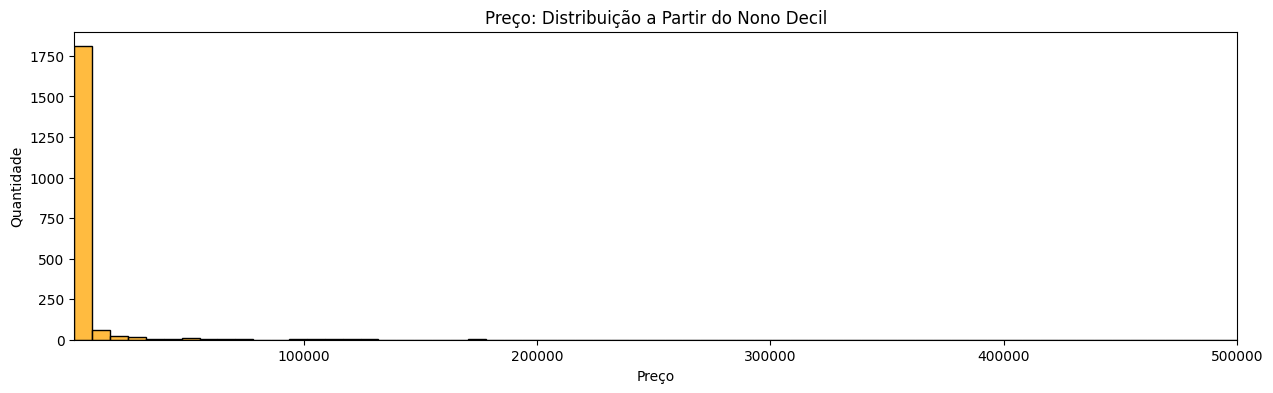

In [4]:
# Observando os dados entre a media e o nono decil e comparando com os dados entre o nono decil e o desvio padrão
price_look2 = dados_limpos[dados_limpos.price > deciles.iloc[-1][2]]['price']

fig, (ax2) = plt.subplots(ncols=1, sharey = False, figsize = (15, 4))
sns.histplot(price_look2, kde = False, color='orange', ax = ax2, bins= int(price_look2.count()/30)) # intervalos de tamanho 16
ax2.grid(False)
ax2.set_title('Preço: Distribuição a Partir do Nono Decil')
ax2.set_ylabel('Quantidade')
ax2.set_xlabel('Preço')
ax2.set_xlim(price_look2.min(), price_look2.max())


In [5]:
dados_limpos = dados_limpos[dados_limpos.price < deciles.iloc[-1][2]]
dados_limpos.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.779900e+04,1.779900e+04,17799.000000,17799.000000,17799.000000,17799.000000,17799.000000,17799.000000,17799.000000,17799.000000,17799.000000
mean,1.632500e+17,1.385914e+08,-22.967244,-43.245553,580.916287,3.941738,25.584302,0.911077,6.359964,188.624417,8.971965
std,2.875476e+17,1.470273e+08,0.034240,0.096610,374.802844,21.189674,44.027692,1.047872,17.258335,132.239731,12.006251
min,1.787800e+04,3.607000e+03,-23.072840,-43.689910,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,1.586532e+07,1.618335e+07,-22.984240,-43.299685,281.000000,2.000000,3.000000,0.190000,1.000000,63.000000,1.000000
50%,4.100528e+07,7.446362e+07,-22.972040,-43.193490,500.000000,2.000000,9.000000,0.550000,2.000000,172.000000,4.000000
75%,5.428633e+07,2.313291e+08,-22.955830,-43.185090,800.000000,3.000000,28.000000,1.250000,4.000000,328.000000,12.000000
max,7.900352e+17,4.918992e+08,-22.749690,-43.104400,1670.000000,999.000000,563.000000,18.170000,228.000000,365.000000,174.000000


(0.0, 1670.0)

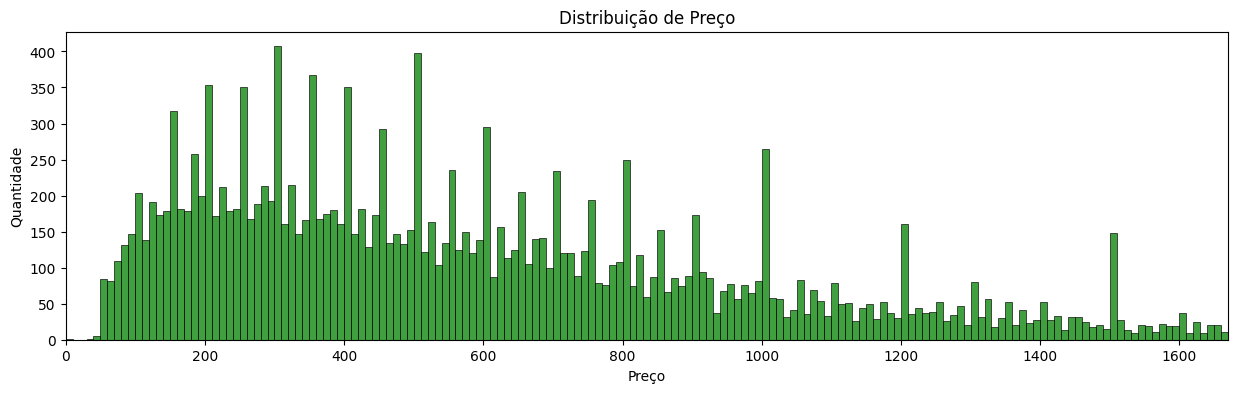

In [6]:
price_look = dados_limpos[dados_limpos.price < dados_limpos.price.mean()]['price']

fig, (ax1) = plt.subplots(ncols = 1, sharey = False, figsize = (15, 4))
sns.histplot(dados_limpos['price'], kde = False, color='green', ax = ax1, bins= int(dados_limpos['price'].max()/10)) # intervalos de tamanho 16
ax1.grid(False)
ax1.set_title('Distribuição de Preço')
ax1.set_ylabel('Quantidade')
ax1.set_xlabel('Preço')
ax1.set_xlim(0, dados_limpos['price'].max())

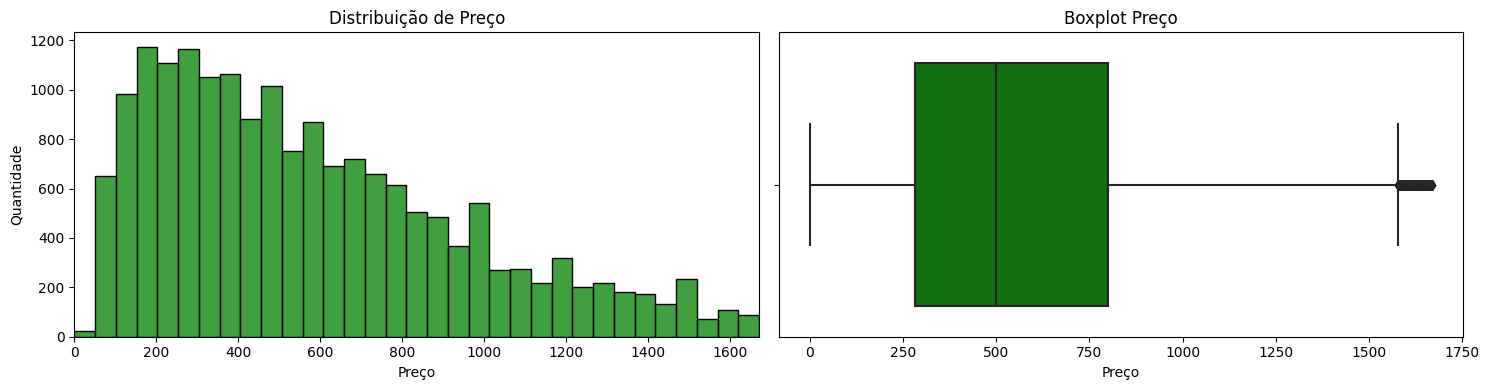

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = False, figsize = (15, 4))

sns.histplot(dados_limpos['price'], kde = False, color='green', ax = ax1, bins= 33) # intervalos de tamanho 50.6
ax1.grid(False)
ax1.set_title('Distribuição de Preço')
ax1.set_ylabel('Quantidade')
ax1.set_xlabel('Preço')
ax1.set_xlim(0, dados_limpos.price.max())

sns.boxplot(x=dados_limpos['price'], ax = ax2, color='green')
ax2.grid(False)
ax2.set_xlabel('Preço')
ax2.set_title('Boxplot Preço')

plt.tight_layout()

In [8]:
dados_limpos.number_of_reviews_ltm.max()

174

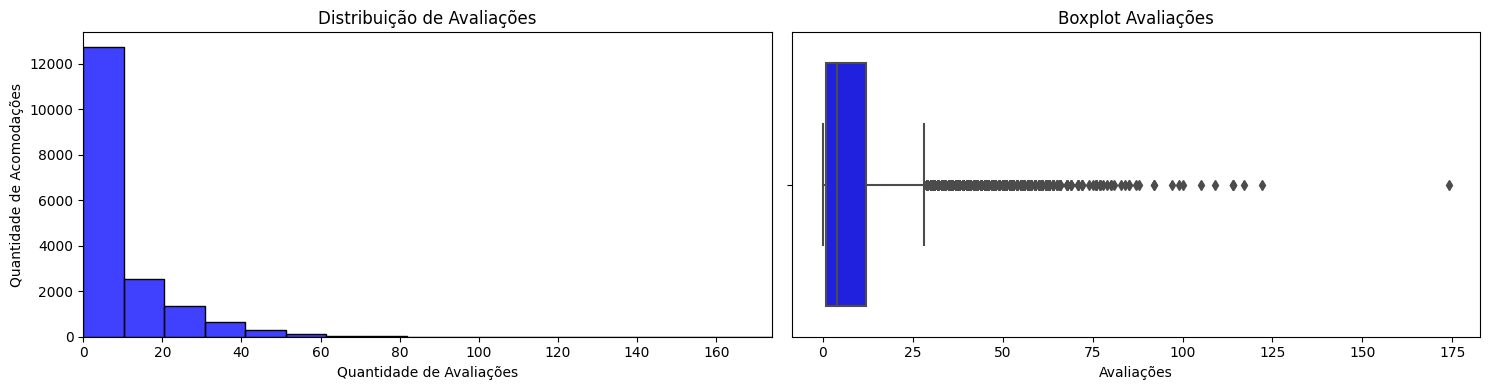

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = False, figsize = (15, 4))

sns.histplot(dados_limpos['number_of_reviews_ltm'],
             kde = False, color='blue', ax = ax1, 
             bins= int(dados_limpos.number_of_reviews_ltm.max()/10)) # intervalos de tamanho 17
ax1.grid(False)
ax1.set_title('Distribuição de Avaliações')
ax1.set_ylabel('Quantidade de Acomodações')
ax1.set_xlabel('Quantidade de Avaliações')
ax1.set_xlim(0, dados_limpos.number_of_reviews_ltm.max())

sns.boxplot(x=dados_limpos['number_of_reviews_ltm'], ax = ax2, color='blue')
ax2.grid(False)
ax2.set_xlabel('Avaliações')
ax2.set_title('Boxplot Avaliações')

plt.tight_layout()

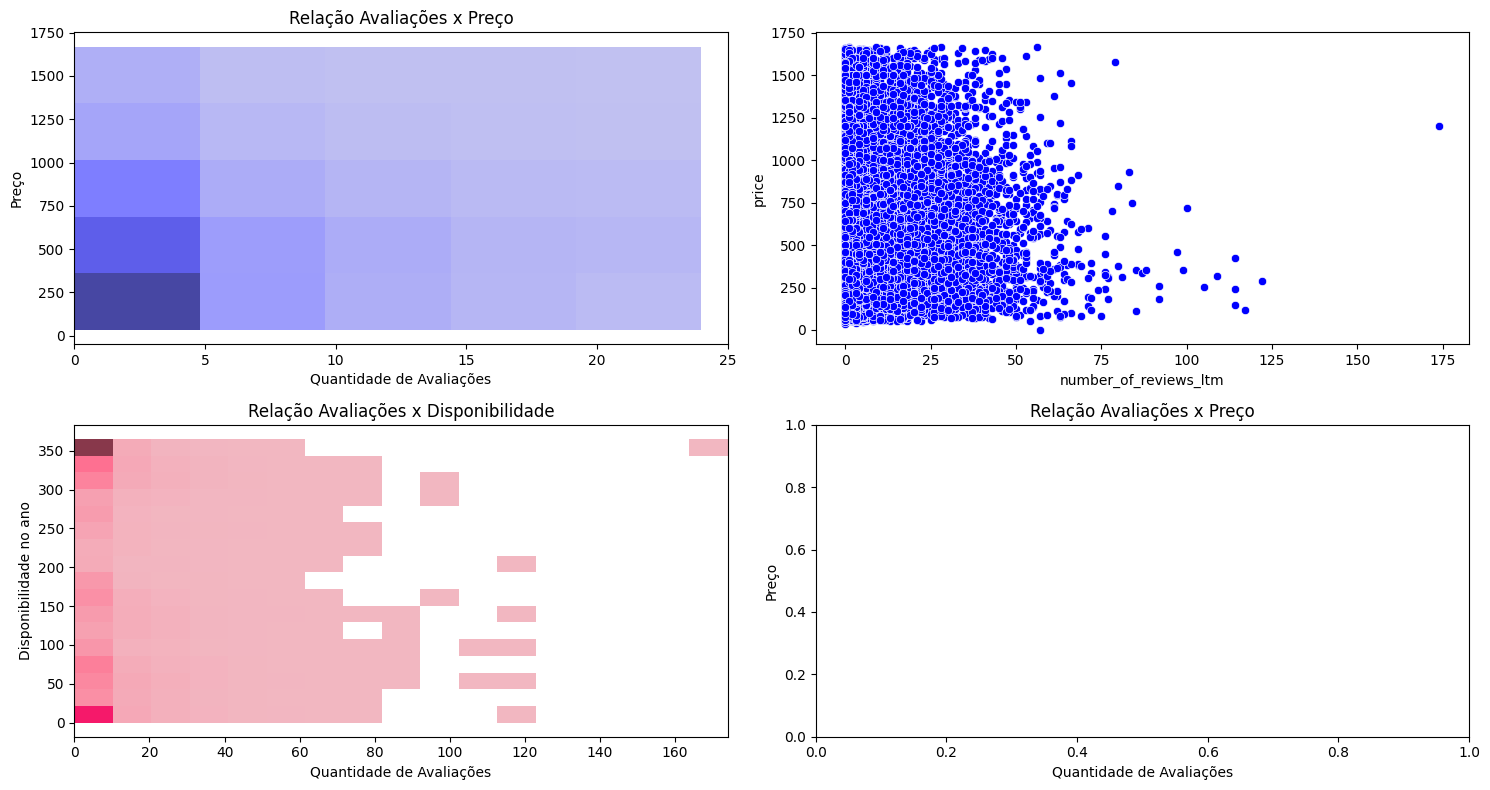

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols = 2, nrows=2, sharey = False, figsize = (15, 8))

hist = sns.histplot(x=dados_limpos[dados_limpos.number_of_reviews_ltm < 25]['number_of_reviews_ltm'], y=dados_limpos['price'], 
             kde = False, color='blue', ax = ax1, 
             bins= 5) # intervalos de tamanho 17
        
ax1.grid(False)
ax1.set_title('Relação Avaliações x Preço')
ax1.set_ylabel('Preço')
ax1.set_xlabel('Quantidade de Avaliações')
ax1.set_xlim(0, 25)

sns.scatterplot(x=dados_limpos['number_of_reviews_ltm'], y=dados_limpos['price'], color='blue', ax=ax2)
plt.title('Relação Avaliações x Preço',)
plt.xlabel('Quantidade de Avaliações')
plt.ylabel('Preço')

sns.histplot(x=dados_limpos['number_of_reviews_ltm'], y=dados_limpos['availability_365'], 
             kde = False, color='pink', ax = ax3, 
             bins= int(dados_limpos.number_of_reviews_ltm.max()/10)) # intervalos de tamanho 17
ax3.grid(False)
ax3.set_title('Relação Avaliações x Disponibilidade')
ax3.set_ylabel('Disponibilidade no ano')
ax3.set_xlabel('Quantidade de Avaliações')
ax3.set_xlim(0, dados_limpos.number_of_reviews_ltm.max())

plt.tight_layout()